In [1]:
#detect time series anomaly using z-score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')


In [2]:
 
def z_score_detect(data,threshold):
    '''
    data: time series data
    threshold: threshold to detect anomaly
    '''
    #calculate mean and std
    mean = np.mean(data)
    std = np.std(data)
    #calculate z-score
    z_score = (data - mean)/std
    #find anomaly
    anomaly = np.where(z_score > threshold)
    return anomaly

In [3]:
def plot_anomaly(data,anomaly):
    '''
    data: time series data
    anomaly: anomaly index
    '''
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(data, label='data')
    ax.scatter(anomaly, data[anomaly], color='red', label='anomaly')
    plt.legend()
    plt.show()

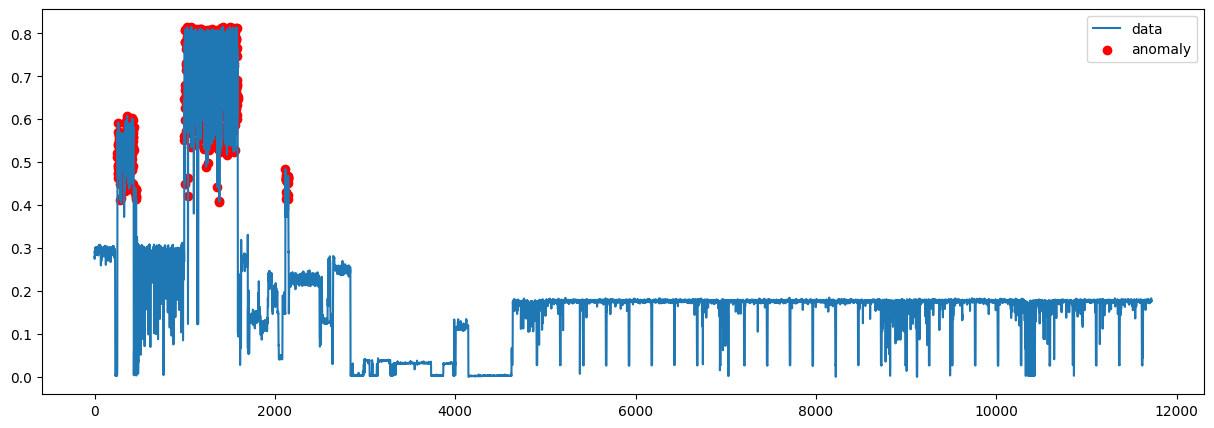

In [11]:
if __name__ == '__main__':
    #load data
    data = pd.read_csv('data/m16_cpu_usage_clean.csv')
    data['time'] = pd.to_datetime(data['time'])
    #detect anomaly
    anomaly = z_score_detect(data['cpu_util'],1.5)
    #plot anomaly
    plot_anomaly(data['cpu_util'],anomaly[0])

In [52]:
#generate new data with time
new_date = pd.date_range(start='2017-11-08 02:00:00+00:00', end='2017-11-08 11:00:00+00:00', freq='5min')
#create new_Cpu data with np random uniform in range 0.0 to 1.0 every 5 minutes
# new_cpu = np.random.uniform(0.0, 1.0, size=len(new_date))
# new_cpu[0] = 0.35
new_cpu = np.array([
  0.35,
  0.385,
  0.4,
  0.35,
  0.385,
  0.4,
  0.35,
  0.385,
  0.4,
  0.32,
  0.35,
  0.358,
  0.363,
  0.385,
  0.4,
  0.32,
  0.35,
  0.385,
  0.4,
  0.32,
  0.35,
  0.385,
  0.4,
  0.32,
  0.1,
  0.8,
  0.82,
  0.79,
  0.8,
  0.78,
  0.6,
  0.73,
  0.65,
  0.74,
  0.684,
  0.75,
  0.690,
  0.2,
  0.15,
  0.24,
  0.234543,
  0.265,
  0.32,
  0.2,
  0.15,
  0.24,
  0.26,
  0.265,
  0.32,
  0.2,
  0.15,
  0.24,
  0.233,
  0.265,
  0.32,
  0.7,
  0.8,
  0.82,
  0.79,
  0.8,
  0.78,
  0.7,
  0.8,
  0.82,
  0.79,
  0.8,
  0.78,
  0.7,
  0.8,
  0.82,
  0.79,
  0.8,
  0.78,
  0.5,
  0.4,
  0.43,
  0.1,
  0.123,
  0.15,
  0.1,
  0.23,
  0.16,
  0.14,
  0.123,
  0.15,
  0.1,
  0.123,
  0.15,
  0.64,
  0.62,
  0.61,
  0.60,
  0.632,
  0.65,
  0.63,
  0.60,
  0.632,
  0.85,
  0.63,
  0.80,
  0.94,
  0.95,
  0.952423,
  0.923,
  0.9,
  0.1,
  0.6,
  0.45,
  0.45,
])

new_date.shape, new_cpu.shape

((109,), (109,))

In [53]:
new_data = pd.DataFrame({'time': new_date, 'cpu_util': new_cpu})

In [54]:
new_data.head()

,time,cpu_util
0,2017-11-08 02:00:00+00:00,0.350
1,2017-11-08 02:05:00+00:00,0.385
2,2017-11-08 02:10:00+00:00,0.400
3,2017-11-08 02:15:00+00:00,0.350
4,2017-11-08 02:20:00+00:00,0.385


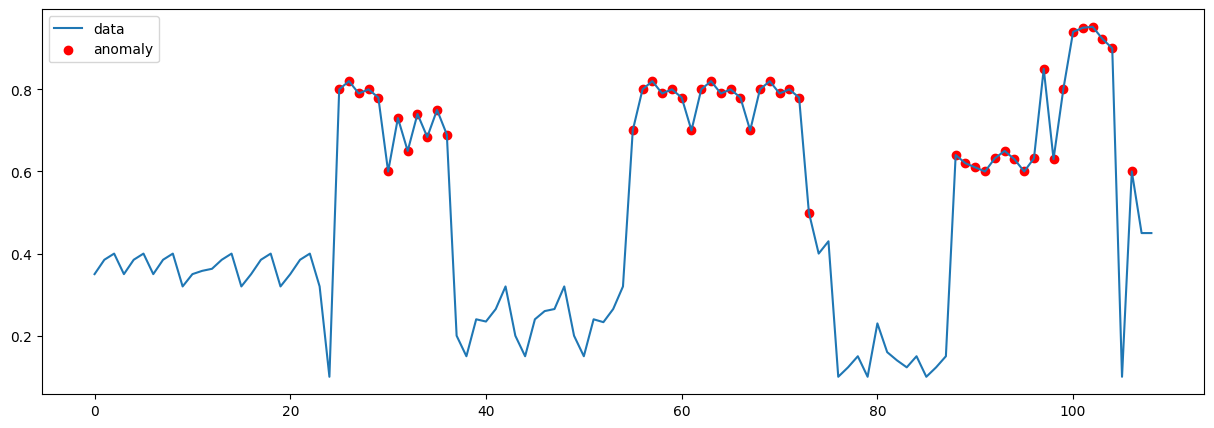

In [58]:
#detect anomaly
anomaly = z_score_detect(new_data['cpu_util'],0.01)
#plot anomaly
plot_anomaly(new_data['cpu_util'],anomaly[0])